# **FMCG Supply Chain Optimization with Machine Learning**

In today's competitive business environment, companies are constantly striving to optimize their supply chain operations to reduce costs, improve customer satisfaction, and increase profitability.

Fast-moving consumer goods (FMCG) companies face unique challenges in supply chain management due to the nature of their products, which have a short shelf life and high demand.

One critical aspect is inventory management, as it directly impacts the availability of products, order fulfillment, and overall operational costs.

### **Insight into the Problem**

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back.

Their higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.

### **Objective**

As a data analyst my objective is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.

### **Description of the features given**

| Column Name | Description |
|---|---|
| Ware_house_ID | Unique identifiers for individual warehouses. |
| WH_Manager_ID | Unique identifiers for warehouse managers. |
| Location_type | Indicates the type of location where each warehouse is situated. |
| WH_capacity_size | Represents the capacity or size of each warehouse. |
| zone | Categorizes warehouses into specific zones. |
| WH_regional_zone |	Assigns each warehouse to a regional zone. |
|num_refill_req_l3m|	Records the number of refill requests received in the last 3 months.|
|transport_issue_l1y|	Indicates if there have been any transport-related issues within the last year.|
|Competitor_in_mkt|	Specifies the presence of competitors in the market.|
|retail_shop_num	|Provides the number of retail shops associated with each warehouse.|
|wh_owner_type|	Describes the ownership type of each warehouse.|
|distributor_num|	Represents the number of distributors associated with each warehouse.|
|flood_impacted	| Indicates whether a warehouse has been impacted by floods.|
|flood_proof|	Specifies whether a warehouse is flood-proof.|
|electric_supply	|Indicates the status of electric supply to each warehouse.|
|dist_from_hub	|Represents the distance of each warehouse from the hub.|
|workers_num	|Provides the number of workers employed at each warehouse.|
|wh_est_year	|Represents the year in which each warehouse was established.|
|storage_issue_reported_l3m	|Indicates whether any storage issues have been reported in the last 3 months.|
|temp_reg_mach|	Specifies the presence of temperature regulation machinery at each warehouse.|
|approved_wh_govt_certificate|	Indicates if each warehouse has an approved government certificate.|
|wh_breakdown_l3m|	Indicates whether any breakdowns have occurred at each warehouse in the last 3 months.|
|govt_check_l3m	|Indicates if government checks have been conducted for each warehouse in the last 3 months.|
| product_wg_ton | Represents the weight of the product in tons.|

# Implementation

# **Loading the train data**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Loading train dataset to 'df' variable
df=pd.read_csv(r'/content/supply_train.csv')
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


# **Data exploration and cleaning**

In [ ]:
# Shape of dataframe
df.shape

(16620, 25)

###### **Checking for duplicates**

In [ ]:
# Identifying duplicate rows in the dataset if any
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

###### **Checking for data type**

In [ ]:
# Structure of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

The datatypes are correctly specified. But 'workers_num' is an integer number but specified as float, so I will soon change that.

###### **Checking the null values**

In [ ]:
# Sum of missing values column wise
df.isnull().sum()

,0
Unnamed: 0,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0


Missing values are found to be around 4% for 'workers_num' and 'approved_wh_govt_certificate'. But for the feature 'wh_est_year', 47% values are missing. Hence it will be wise to impute the first two columns and drop the warehouse established year in this analysis.


###### **Imputing null values**

We will impute the missing values in the dataset

In [ ]:
# Distribution of values 'workers_num'(number of workers in the warehouse) column.
df['workers_num'].describe()

,workers_num
count,15953.000000
mean,28.911490
std,7.842046
min,10.000000
25%,24.000000
50%,28.000000
75%,33.000000
max,98.000000


In [ ]:
# Mode of 'workers_num'
df['workers_num'].mode()

,workers_num
0,28.0


The mean, median and mode values are found to be same. We can confer that the data is normally distributed. Therefore, on an average there are 28 workers in a warehouse and this information can be used to impute the missing values.

In [ ]:
# Replacing missing values in 'workers_num' with median
df['workers_num'].fillna(df['workers_num'].median(),inplace=True)

In [ ]:
# Changing datatype of workers_num to integer
df['workers_num']=df['workers_num'].astype(int)

Since the feature 'approved_wh_govt_certificate' is an object type and non-numeric, we use mode to impute the missing values.

In [ ]:
# Mode of 'approved_wh_govt_certificate'
df['approved_wh_govt_certificate'].mode()

,approved_wh_govt_certificate
0,C


In [ ]:
# Replacing missing values in 'approved_wh_govt_certificate' with mode
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0],inplace=True)

###### **Dropping irrelevant columns**

In [ ]:
# Dropping columns which are not of much relevence while developing a model
df1 = df.drop(columns=['Unnamed: 0','Ware_house_ID','WH_Manager_ID', 'wh_est_year'])
df1

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,Urban,Large,West,Zone 6,3,1,6,4779,Rented,70,...,0,0,240,19,14,0,B+,5,23,16094
16616,Urban,Large,North,Zone 5,2,0,2,5718,Company Owned,26,...,0,1,164,30,17,0,B+,6,24,21113
16617,Rural,Large,North,Zone 6,5,0,4,4514,Company Owned,50,...,0,1,211,24,24,1,B,5,29,28117
16618,Rural,Small,West,Zone 6,3,2,3,5829,Rented,59,...,0,1,119,28,16,0,A,5,15,21103


In [ ]:
df1.isnull().sum()

,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0
wh_owner_type,0
distributor_num,0


There are no more null values present in the dataset.

# **Exploratory Data Analysis**

In [ ]:
df1.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25,18,0,C,6,24,24071


In [ ]:
#Categorical and numerical features in the dataset

categorical_columns = df1.select_dtypes(include=['object'])
print("Categorical columns are:\n\n",df1.select_dtypes(include=['object']).columns.to_list())

numerical_columns = df1.select_dtypes(exclude=['object'])
print("\nNumerical columns are:\n\n",df1.select_dtypes(exclude=['object']).columns.to_list())

Categorical columns are:

 ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

Numerical columns are:

 ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']



## **Univariate Analysis of Categorical Data**

<ipython-input-19-efb564d8ab1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=column,palette='bwr')
<ipython-input-19-efb564d8ab1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=column,palette='bwr')
<ipython-input-19-efb564d8ab1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=column,palette='bwr')
<ipython-input-19-efb564d8ab1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

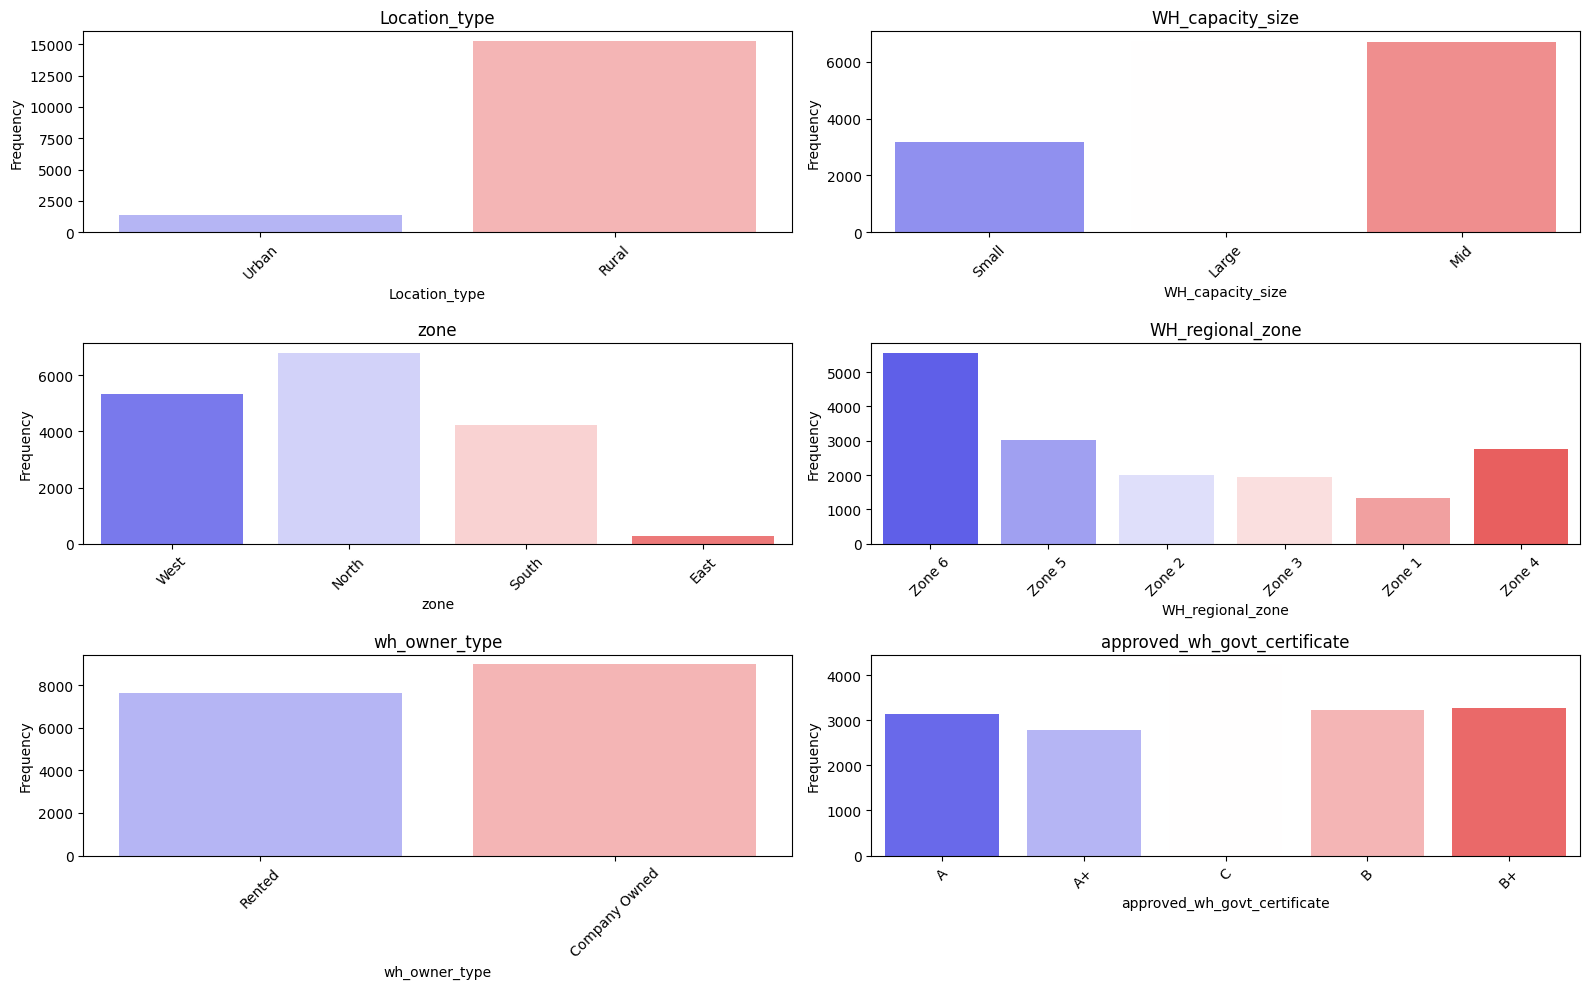

In [ ]:
# Count plots of categorical features

plt.figure(figsize=(16, 10))

for column in categorical_columns.columns:
    plt.subplot(3, 2, categorical_columns.columns.get_loc(column) + 1)
    sns.countplot(data=df1, x=column,palette='bwr')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Key Insights**

* Majority of warehouses are located in the rural areas.
* Most warehouses support 'large' and 'medium' capacities and a few have 'small' capacity.
* Most of the warehouses are concentrated in the North zone, followed by West and South zones. Compared to these, there is a neglible presence of warehouses in the East zone.
* Zone 6 alone has more than 5000 warehouses, becoming the zone with the maximum number of warehouses.
* Warehouses can either be Rented or Owned by the company, with a roughly equal divide which highlights a balanced approach to managing assets.
* Most of the warehouses have been issued 'C' category certificate.

## **Univariate Analysis of Numerical Data**

<ipython-input-20-c27b875dda72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[column], palette = 'Paired')
<ipython-input-20-c27b875dda72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[column], palette = 'Paired')
<ipython-input-20-c27b875dda72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1[column], palette = 'Paired')
<ipython-input-20-c27b875dda72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for

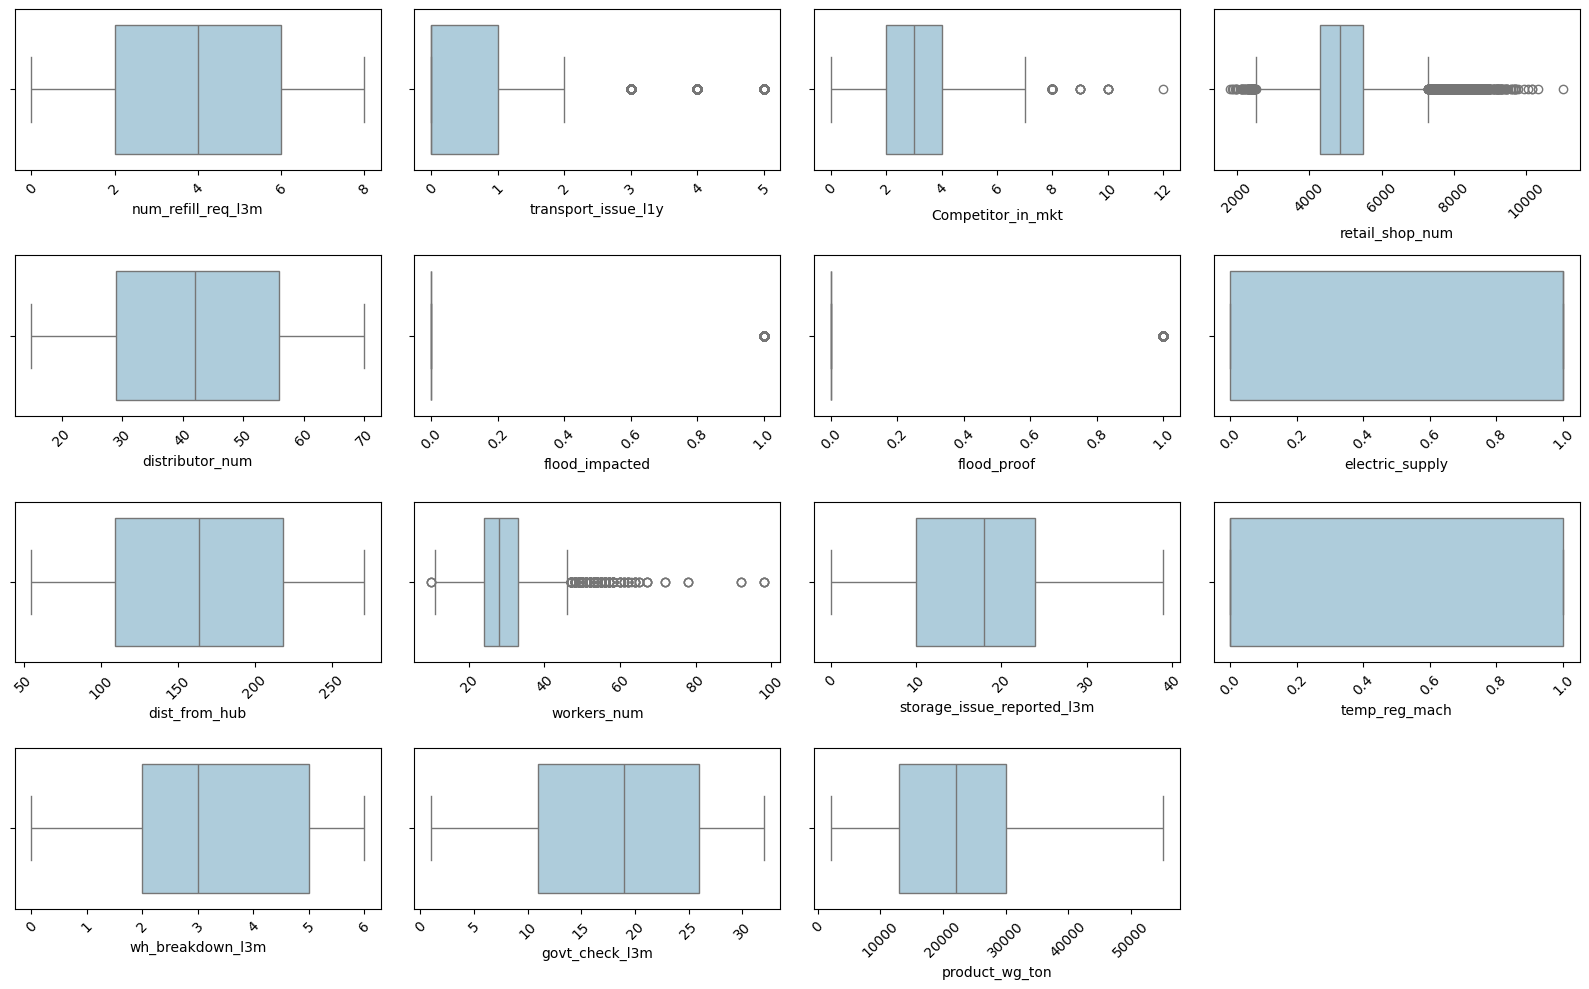

In [ ]:
#Distribution of numerical features

plt.figure(figsize=(16, 10))

for i, column in enumerate(numerical_columns.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df1[column], palette = 'Paired')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
numerical_columns = df1.select_dtypes(include=['number'])
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,16620.0,4.126655,2.606241,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,16620.0,0.780927,1.206351,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,16620.0,3.103129,1.147711,0.0,2.0,3.0,4.0,12.0
retail_shop_num,16620.0,4983.904994,1051.032239,1821.0,4309.0,4856.0,5500.0,11008.0
distributor_num,16620.0,42.473706,16.090000,15.0,29.0,42.0,56.0,70.0
flood_impacted,16620.0,0.096871,0.295791,0.0,0.0,0.0,0.0,1.0
flood_proof,16620.0,0.056017,0.229961,0.0,0.0,0.0,0.0,1.0
electric_supply,16620.0,0.655716,0.475149,0.0,0.0,1.0,1.0,1.0
dist_from_hub,16620.0,163.521901,62.701193,55.0,109.0,164.0,218.0,271.0
workers_num,16620.0,28.874910,7.685148,10.0,24.0,28.0,33.0,98.0


### **Key Insights**

From above statistical summary it can be noted that:

1. **Operational Activity and Efficiency**
* Refill Requests: Most warehouses have between 2 to 6 refill requests, indicating moderate to high activity. This suggests frequent stock replenishment, pointing to high turnover rates or robust demand.
* Storage Issues: The average number of storage issues reported is 17 in the last 3 months, with some warehouses reporting up to 39 issues. This indicates potential inefficiencies or problems in inventory management.
* Warehouse Breakdowns: Warehouses report up to 6 breakdowns, with most around 3. This suggests maintenance concerns that could disrupt operations.
* Product Weight: The product weight ranges significantly, from 2093 to 55151 tons. This variation reflects the different capacities and scales of operation across warehouses.
2. **Competitive and Market Environment**
* Competitors in Market: Most areas have 2 to 4 competitors, with some having as many as 12. This reflects the competitive landscape in which these warehouses operate.
* Retail Shops: The number of retail shops selling noodles produced ranges widely from 4309 to as many as 11008, depending on the region. This indicates a diverse market presence and potential customer base.
* Distributors: On average, there are 42 distributors associated with each warehouse, indicating the extent of the distribution network and market reach.
3. **Infrastructure and Environmental Challenges**
* Flood Impact and Flood-Proofing: Most warehouses are not impacted by floods, but up to 10% have been affected. Very few warehouses have flood-proofing measures in place, indicating a vulnerability to environmental factors.
* Electric Supply Issues: A significant number of warehouses face issues with electric supply, which could affect operations, especially in critical processes.
* Temperature Regulation: Less than one-third of warehouses have temperature regulation machinery, which could limit the types of goods stored, particularly those requiring controlled environments.
4. **Regulatory Oversight and Compliance**
* Government Checks: Government checks have been conducted an average of 18 times in the last 3 months, with a maximum of 32 checks in some cases. This reflects the level of regulatory oversight and compliance requirements faced by the warehouses.
5. **Workforce and Labor Considerations**
* Number of Workers: An average of 28 workers are employed in each warehouse, with the maximum number reaching up to 98. The workforce size varies, reflecting different operational scales or levels of automation.


## **Bivariate Analysis of Categorical Data**

**Distribution of target variable 'product weight (product_wg_ton)' across categorical features**

<ipython-input-22-62ff209553ac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=column, y='product_wg_ton',palette='bwr')
<ipython-input-22-62ff209553ac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=column, y='product_wg_ton',palette='bwr')
<ipython-input-22-62ff209553ac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=column, y='product_wg_ton',palette='bwr')
<ipython-input-22-62ff209553ac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

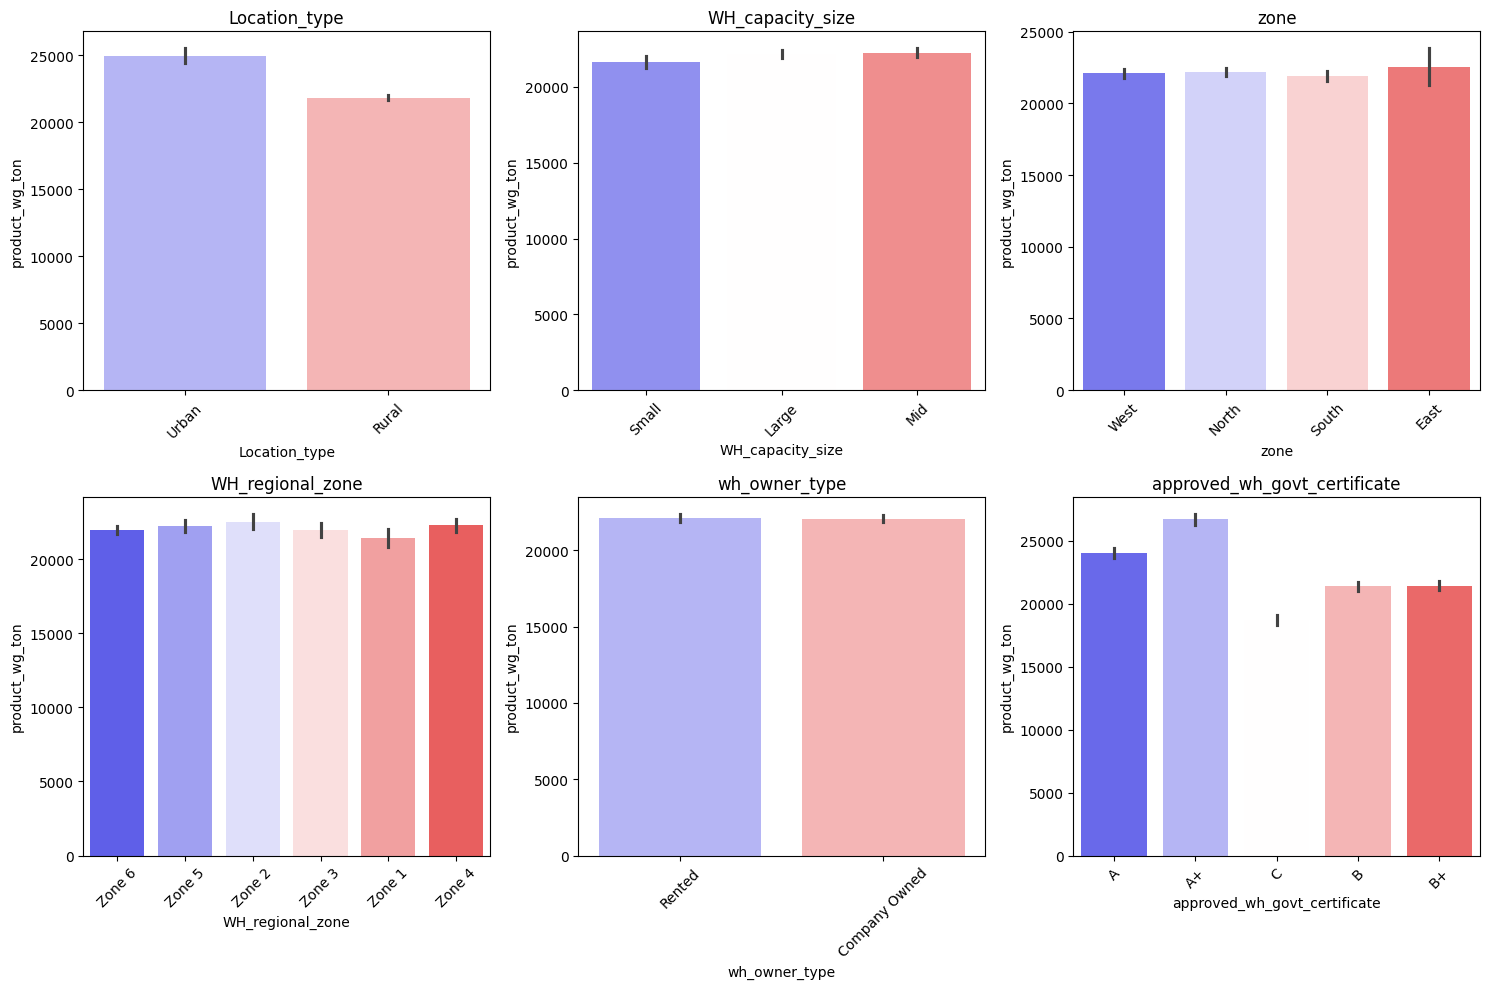

In [ ]:
plt.figure(figsize=(15, 10))
num_columns = len(categorical_columns)

# grid of subplots for categorical columns
for idx, column in enumerate(categorical_columns, start=1):
    plt.subplot(2, 3, idx)
    sns.barplot(data=df1, x=column, y='product_wg_ton',palette='bwr')
    plt.xticks(rotation=45)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

### **Key Insights**

* Larger shipment sizes (product weight) are more for Urban areas.
* Shipment sizes do not show much variation based on Warehouse capacity.
* Product weights are slightly higher for "East" zone when compared to all the other zones, even though as we noted earlier there is a neglible presence of warehouses in the East zone, so possibly there are more large warehouses in the region
* Shipment sizes are not influenced by warehouse owner type or warehouse regional zone.
* A+ or A certified warehouses can handle larger shipment sizes.


## **Bivariate Analysis of Numerical Data**

**Correlation between numerical features**

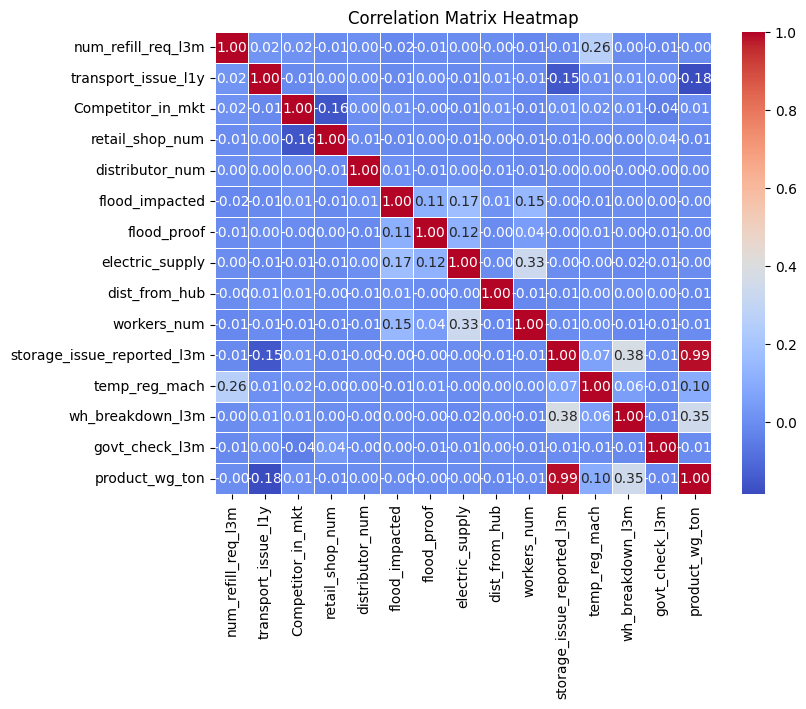

In [ ]:
numerical_columns = df1.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

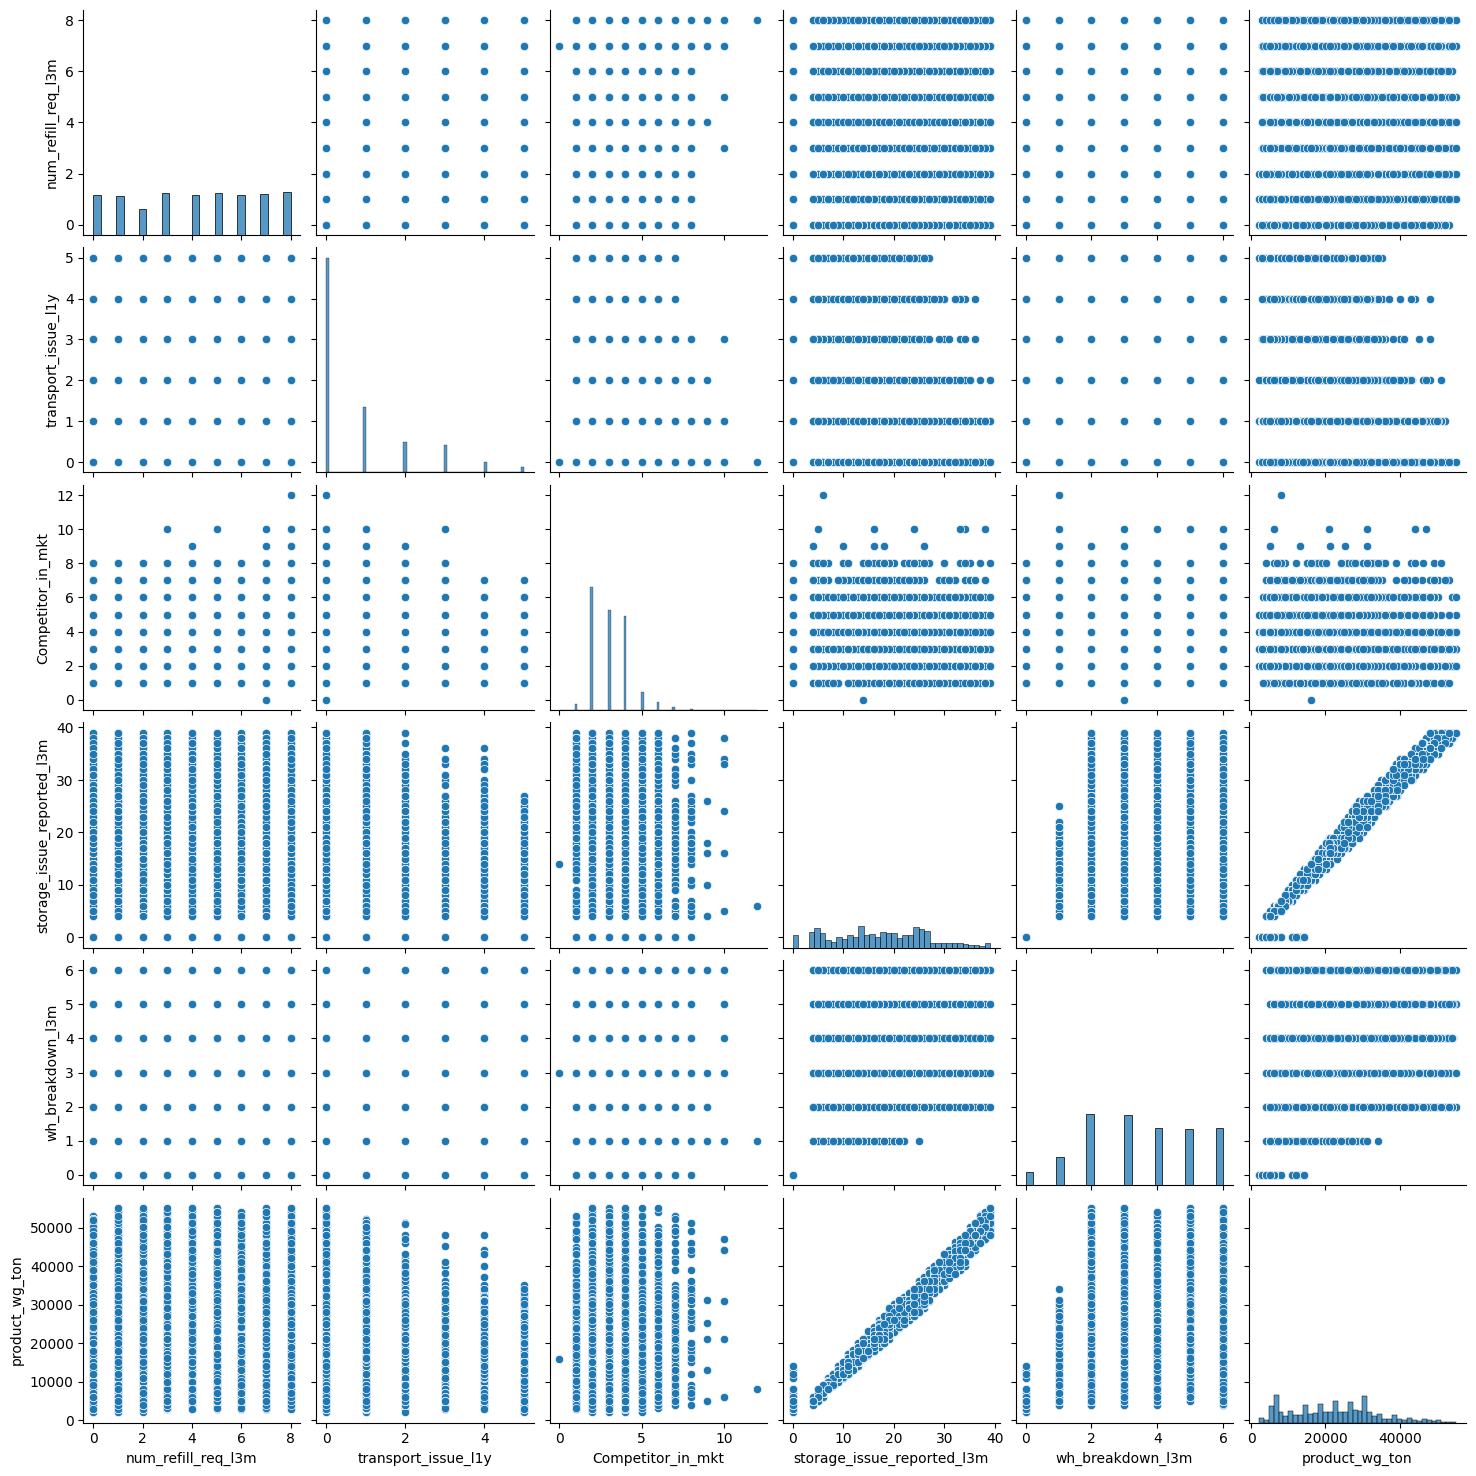

In [ ]:
selected_cols = ['WH_capacity_size', 'zone', 'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
                  'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'product_wg_ton']

# Create a DataFrame with only the selected columns
selected_df = df1[selected_cols]

# Create the pairplot
sns.pairplot(selected_df, diag_kind='hist', palette = 'Paired')
plt.show()

### **Key Insights**

* There appears to be no multicollinearity between the predictor variables.
* A perfect positive correlation (0.99) is found between Product weight (product_wg_ton) and storage issues reported (storage_issue_reported_l3m).
* A high correlation can be beneficial for predictive accuracy but could be problematic if the correlation is spurious, meaning that the two variables are correlated but not causally related. This could lead to misleading interpretations.
* In this context it may be that larger/heavier products are more likely to cause storage issues, then it’s valid to include this variable in our model.


# **Data Analysis**

## **Demand Distribution Across Zones**

In [ ]:
zone_demand = df1.groupby('zone').agg({
    'num_refill_req_l3m': 'mean',
    'retail_shop_num': 'sum',
    'distributor_num': 'mean'
})
print(f'Demand Indicators by Zone:\n{zone_demand}')


Demand Indicators by Zone:
       num_refill_req_l3m  retail_shop_num  distributor_num
zone                                                       
East             4.144404          1347524        41.375451
North            4.067794         34285932        42.430882
South            4.132844         21197394        42.464125
West             4.196053         26001651        42.593233


<ipython-input-26-3a3fe2b8bb80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_demand.index, y=zone_demand['num_refill_req_l3m'], palette='Blues_d')
<ipython-input-26-3a3fe2b8bb80>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_demand.index, y=zone_demand['retail_shop_num'], palette='Greens_d')
<ipython-input-26-3a3fe2b8bb80>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_demand.index, y=zone_demand['distributor_num'], palette='Reds_d')


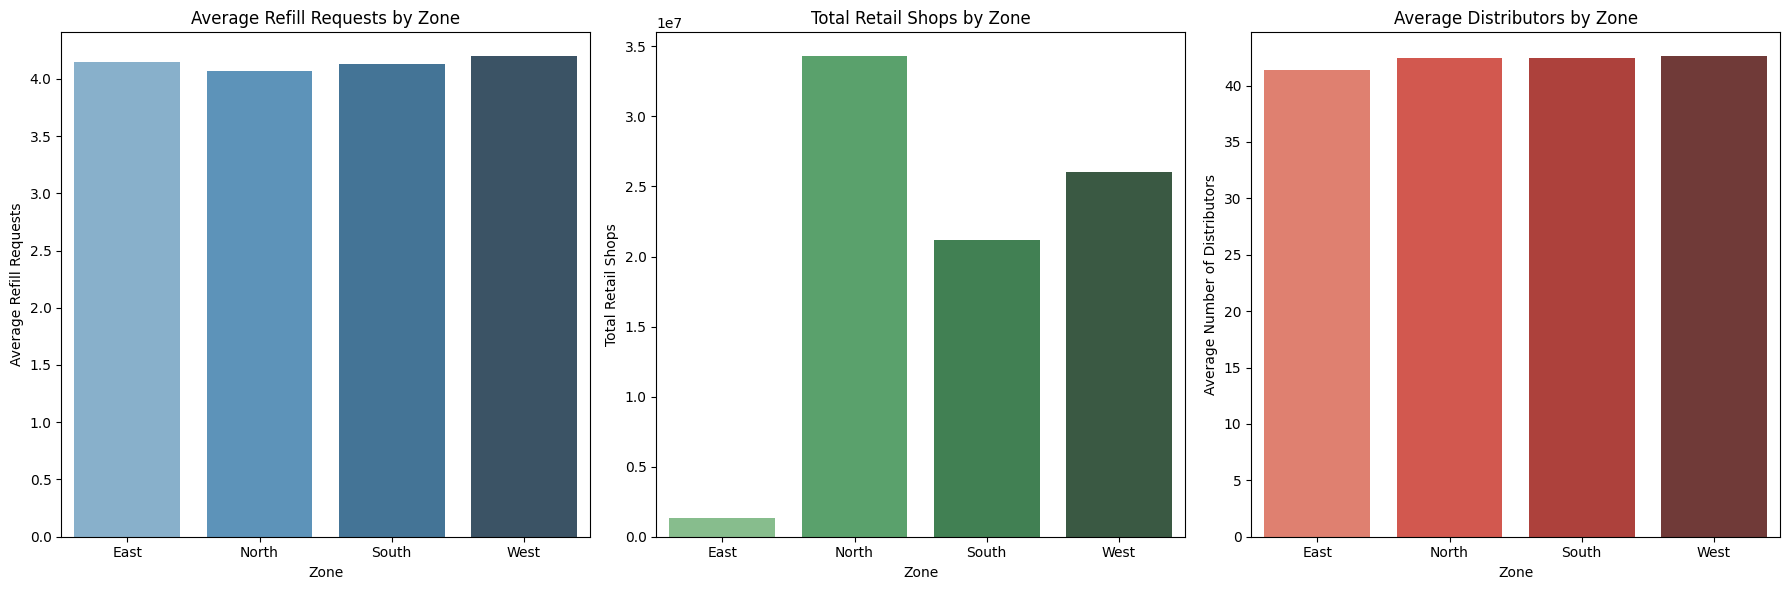

In [ ]:
# Setting the figure size for the subplots
plt.figure(figsize=(18, 6))

# Plotting the average number of refill requests by zone
plt.subplot(1, 3, 1)
sns.barplot(x=zone_demand.index, y=zone_demand['num_refill_req_l3m'], palette='Blues_d')
plt.title('Average Refill Requests by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Refill Requests')

# Plotting the total number of retail shops by zone
plt.subplot(1, 3, 2)
sns.barplot(x=zone_demand.index, y=zone_demand['retail_shop_num'], palette='Greens_d')
plt.title('Total Retail Shops by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Retail Shops')

# Plotting the average number of distributors by zone
plt.subplot(1, 3, 3)
sns.barplot(x=zone_demand.index, y=zone_demand['distributor_num'], palette='Reds_d')
plt.title('Average Distributors by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Number of Distributors')

# Adjusting layout for better spacing
plt.tight_layout()

# Displaying the plots
plt.show()

* The average number of refill requests in the last 3 months is fairly consistent across all zones. This consistency suggests that demand for products is relatively stable across different regions.
* The North zone has an overwhelmingly higher number of retail shops (34,285,932) compared to other zones. This suggests that the North zone is a major market for the products, possibly due to a higher population density, urbanization, or market penetration.  Both South and West zones also have a significant number of retail shops. The East zone has the fewest retail shops (1,347,524), indicating it is a much smaller market compared to the others.
* The average number of distributors is fairly uniform across the zones.


## **Supply Chain Efficiency**

In [ ]:
# Group data by zone and calculate the count of storage and transport issues in each zone
zone_issues = df1.groupby('zone')[['storage_issue_reported_l3m', 'transport_issue_l1y','wh_breakdown_l3m']].sum().reset_index()
zone_issues

,zone,storage_issue_reported_l3m,transport_issue_l1y,wh_breakdown_l3m
0,East,4886,211,967
1,North,116895,5395,23594
2,South,71683,3292,14648
3,West,91190,4081,18813


In [ ]:
zone_supply = df1.groupby('zone').agg({
    'storage_issue_reported_l3m': 'sum',
    'transport_issue_l1y': 'sum',
    'wh_breakdown_l3m': 'sum'
})
print(f'Supply Efficiency Indicators by Zone:\n{zone_supply}')


Supply Efficiency Indicators by Zone:
       storage_issue_reported_l3m  transport_issue_l1y  wh_breakdown_l3m
zone                                                                    
East                         4886                  211               967
North                      116895                 5395             23594
South                       71683                 3292             14648
West                        91190                 4081             18813


<ipython-input-29-1e61f9e034df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_supply.index, y=zone_supply['storage_issue_reported_l3m'], palette='Oranges_d')
<ipython-input-29-1e61f9e034df>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_supply.index, y=zone_supply['transport_issue_l1y'], palette='Purples_d')
<ipython-input-29-1e61f9e034df>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_supply.index, y=zone_supply['wh_breakdown_l3m'], palette='Greens_d')


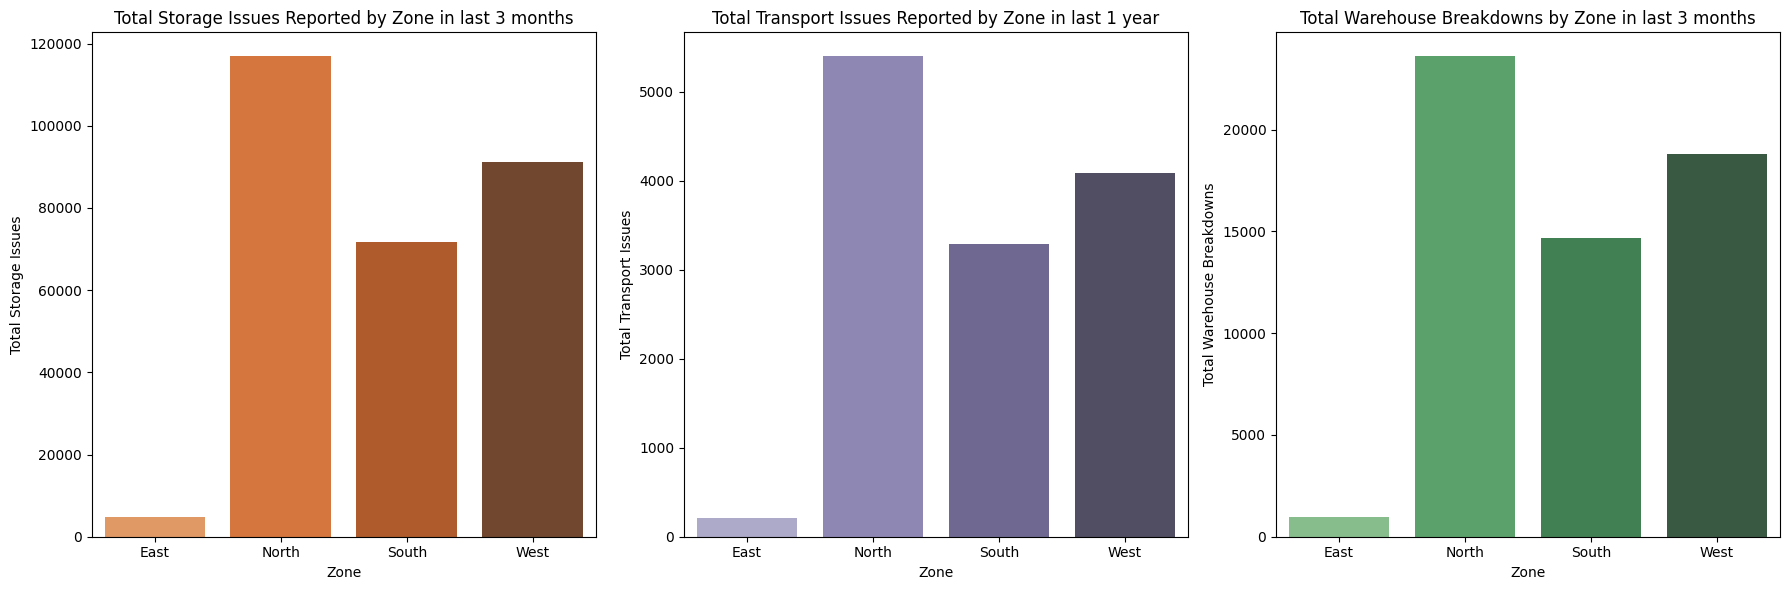

In [ ]:
# Setting the figure size for the subplots
plt.figure(figsize=(18, 6))

# Plotting the total storage issues reported by zone
plt.subplot(1, 3, 1)
sns.barplot(x=zone_supply.index, y=zone_supply['storage_issue_reported_l3m'], palette='Oranges_d')
plt.title('Total Storage Issues Reported by Zone in last 3 months')
plt.xlabel('Zone')
plt.ylabel('Total Storage Issues')

# Plotting the total transport issues reported by zone
plt.subplot(1, 3, 2)
sns.barplot(x=zone_supply.index, y=zone_supply['transport_issue_l1y'], palette='Purples_d')
plt.title('Total Transport Issues Reported by Zone in last 1 year')
plt.xlabel('Zone')
plt.ylabel('Total Transport Issues')

# Plotting the total warehouse breakdowns reported by zone
plt.subplot(1, 3, 3)
sns.barplot(x=zone_supply.index, y=zone_supply['wh_breakdown_l3m'], palette='Greens_d')
plt.title('Total Warehouse Breakdowns by Zone in last 3 months')
plt.xlabel('Zone')
plt.ylabel('Total Warehouse Breakdowns')

# Adjusting layout for better spacing
plt.tight_layout()

# Displaying the plots
plt.show()


* North zone faces a higher number of storage issues, transport issues, and warehouse breakdowns compared to all other zones.
* The East zone has a relatively smaller number of issues, owing to the fact that warehouse numbers are less in this zone.
* Considering the data from the last 3 months, the counts of storage and warehouse issues across zones are higher.
* In comparison, the number of transport issues reported for a whole year is lower.
* Indicating a significant problem for storage and warehousing than transportation.

## **Competitiveness in the market**

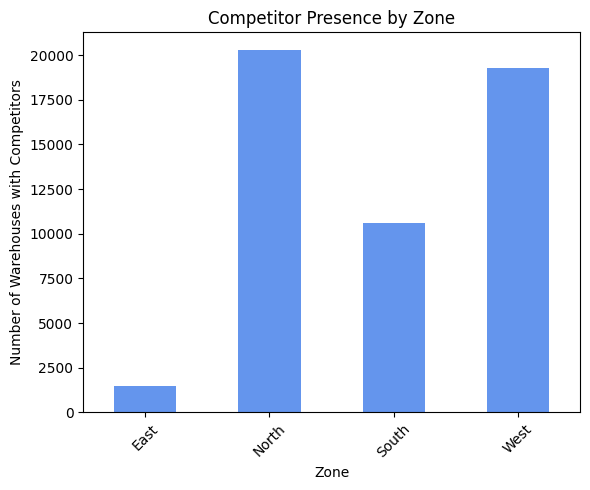

In [ ]:
# Group the data by 'zone' and count the number of warehouses with competitors in each zone
competitor_count = df1.groupby('zone')['Competitor_in_mkt'].sum()

# Plotting the bar chart
plt.figure(figsize=(6,5))
competitor_count.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Zone')
plt.ylabel('Number of Warehouses with Competitors')
plt.title('Competitor Presence by Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* High number of competitors are concentrated in North and West Zones.
* As we saw earlier this is synonymous with the demand in the zones as indicated by presence of retail shops.

## **Operational Risk Analysis**

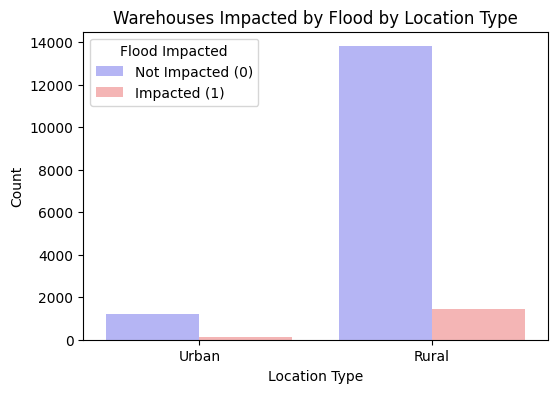

In [ ]:
#Bar chart for warehouses impacted by floods by location type
plt.figure(figsize=(6,4))

sns.countplot(data=df1, x='Location_type', hue='flood_impacted', palette='bwr')

plt.title('Warehouses Impacted by Flood by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Flood Impacted', labels=['Not Impacted (0)', 'Impacted (1)'])

plt.show()

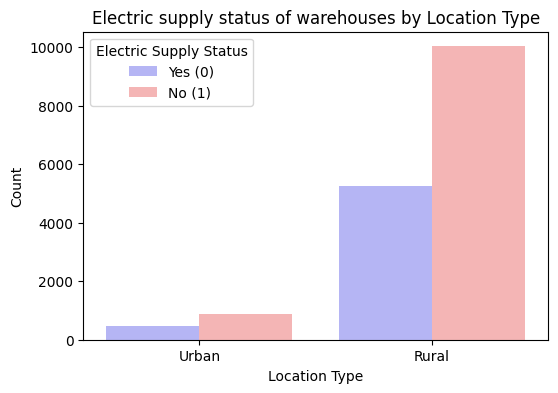

In [ ]:
# Bar chart for electrical supply status of warehouses by location type
plt.figure(figsize=(6,4))
sns.countplot(data=df1, x='Location_type', hue='electric_supply', palette='bwr')

plt.title('Electric supply status of warehouses by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Electric Supply Status', labels=['Yes (0)', 'No (1)'])

plt.show()


* Warehouses in rural areas require enhancements in both flood resilience and electric supply status.

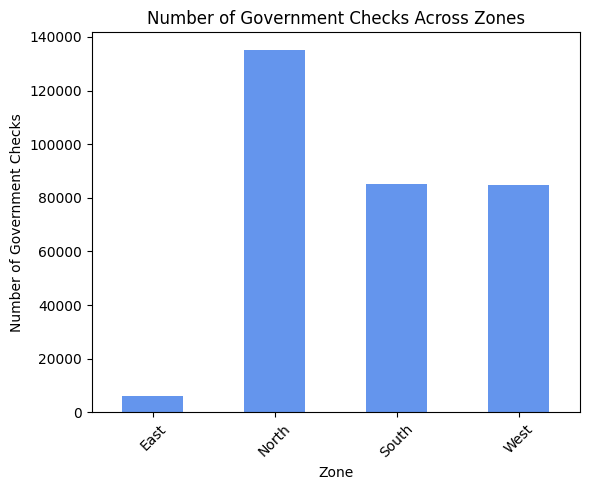

In [ ]:
# Group the data by 'zone' and count the number of government checks in each zone
govt_check_count = df1.groupby('zone')['govt_check_l3m'].sum()

plt.figure(figsize=(6,5))
govt_check_count.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Zone')
plt.ylabel('Number of Government Checks')
plt.title('Number of Government Checks Across Zones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Distribution of target variable - 'product_wg_ton'**

In [ ]:
df1['product_wg_ton'].describe()

,product_wg_ton
count,16620.000000
mean,22098.420096
std,11620.337346
min,2093.000000
25%,13057.000000
50%,22099.000000
75%,30103.000000
max,55151.000000


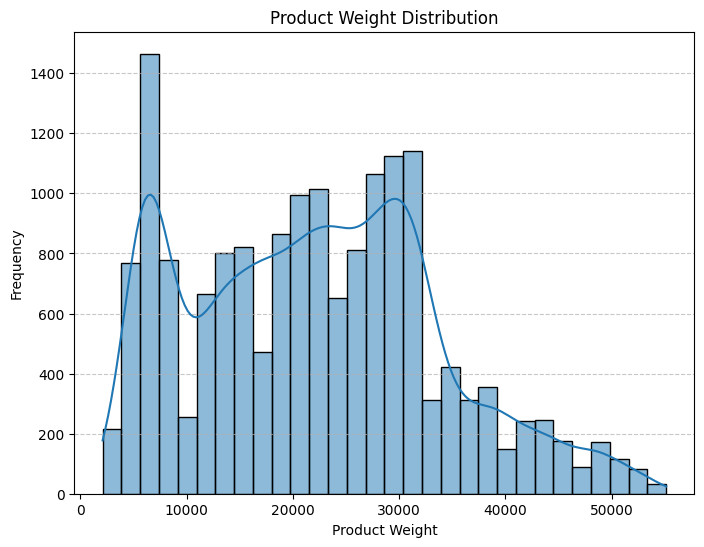

In [ ]:
# histogram plot
plt.figure(figsize=(8,6))
sns.histplot(df1['product_wg_ton'], bins=30, kde=True)
plt.title('Product Weight Distribution')
plt.xlabel('Product Weight')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Product weights are highly variable, with high standard deviation.
* Some product weights are significantly heavier or lighter than the mean.

# **Encoding Categorical Variables of train data**

In [ ]:
# Create a copy of df1 as df_encoded
df_encoded = df1.copy()

for col in categorical_columns:
    label_encoder = LabelEncoder()
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

df_encoded

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,1,91,29,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,0,1,210,31,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,161,37,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,0,103,21,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,0,1,112,25,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,1,0,3,5,3,1,6,4779,1,70,...,0,0,240,19,14,0,3,5,23,16094
16616,1,0,1,4,2,0,2,5718,0,26,...,0,1,164,30,17,0,3,6,24,21113
16617,0,0,1,5,5,0,4,4514,0,50,...,0,1,211,24,24,1,2,5,29,28117
16618,0,2,3,5,3,2,3,5829,1,59,...,0,1,119,28,16,0,0,5,15,21103


In [ ]:
print("Shape of the encoded dataframe is:\n",df_encoded.shape)

Shape of the encoded dataframe is:
 (16620, 21)


* All the catecogrical variables have now been encoded using label encoding and now the dataframe 'df_encoded' has 16620 rows and 21 columns.

# **Splitting dataframe into predictor variables (X) and target variable(y)**

In [ ]:
X_train = df_encoded.drop(columns=['product_wg_ton'])
y_train = df_encoded['product_wg_ton']

In [ ]:
X_train.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31,4,0,0,3,17
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37,17,0,0,6,22
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21,17,1,1,3,27
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25,18,0,4,6,24


In [ ]:
y_train.head()

,product_wg_ton
0,17115
1,5074
2,23137
3,22115
4,24071


# **Test data Preprocessing**


Following the same steps of preprocessing train data for test data as well.

In [ ]:
test = pd.read_csv(r"/content/supply_test.csv")
test

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [ ]:
test.shape

(5529, 25)

###### **Checking for duplicates**

In [ ]:
# Identifying duplicate rows in the dataset if any
test.duplicated().sum()

0

There are no duplicate rows in the test dataset.

###### **Dropping irrelevant columns**

In [ ]:
# Dropping columns which are not of much relevence while developing a model
test = test.drop(columns=['Unnamed: 0','Ware_house_ID','WH_Manager_ID', 'wh_est_year'])
test

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Rural,Large,North,Zone 5,5,0,3,5590,Company Owned,15,...,0,0,156,30.0,24,0,A,2,5,30132
1,Rural,Large,North,Zone 5,5,0,2,5856,Company Owned,40,...,0,1,79,31.0,5,1,C,2,24,6075
2,Rural,Small,North,Zone 6,3,0,3,4803,Rented,40,...,0,1,70,41.0,19,1,A+,5,9,24076
3,Rural,Mid,West,Zone 4,5,2,2,4784,Rented,15,...,0,1,255,33.0,9,1,A+,3,11,13092
4,Urban,Mid,North,Zone 4,6,0,4,3699,Rented,24,...,0,0,205,20.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,Rural,Large,North,Zone 6,8,1,3,5030,Rented,46,...,0,1,203,28.0,22,1,A+,2,4,29138
5525,Rural,Small,South,Zone 6,3,1,3,4320,Rented,60,...,0,0,170,NaN,26,0,C,5,9,33108
5526,Rural,Large,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,0,99,22.0,20,0,B+,6,4,24072
5527,Rural,Large,North,Zone 6,6,2,4,4378,Rented,32,...,0,0,220,17.0,13,0,B,3,28,15055


###### **Checking for data type**

In [ ]:
# Structure of dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 5529 non-null   object 
 1   WH_capacity_size              5529 non-null   object 
 2   zone                          5529 non-null   object 
 3   WH_regional_zone              5529 non-null   object 
 4   num_refill_req_l3m            5529 non-null   int64  
 5   transport_issue_l1y           5529 non-null   int64  
 6   Competitor_in_mkt             5529 non-null   int64  
 7   retail_shop_num               5529 non-null   int64  
 8   wh_owner_type                 5529 non-null   object 
 9   distributor_num               5529 non-null   int64  
 10  flood_impacted                5529 non-null   int64  
 11  flood_proof                   5529 non-null   int64  
 12  electric_supply               5529 non-null   int64  
 13  dis

The datatypes are correctly specified. But 'workers_num' is an integer number but specified as float, so I will soon change that.

###### **Checking the null values**

In [ ]:
# Sum of missing values column wise
test.isnull().sum()

,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0
wh_owner_type,0
distributor_num,0


###### **Imputing null values**

We will impute the missing values in the dataset

In [ ]:
# Distribution of values 'workers_num'(number of workers in the warehouse) column.
test['workers_num'].describe()

,workers_num
count,5319.000000
mean,29.010528
std,7.848478
min,10.000000
25%,24.000000
50%,28.000000
75%,33.000000
max,98.000000


In [ ]:
# Mode of 'workers_num'
test['workers_num'].mode()

,workers_num
0,28.0


The median and mode values are found to be same. We can confer that the data is close to normally distributed. Therefore, on an average there are 28 workers in a warehouse and this information can be used to impute the missing values.

In [ ]:
# Replacing missing values in 'workers_num' with median
test['workers_num'].fillna(test['workers_num'].median(),inplace=True)

In [ ]:
# Changing datatype of workers_num to integer
test['workers_num']=test['workers_num'].astype(int)

Since the feature 'approved_wh_govt_certificate' is an object type and non-numeric, we use mode to impute the missing values.

In [ ]:
# Mode of 'approved_wh_govt_certificate'
test['approved_wh_govt_certificate'].mode()

,approved_wh_govt_certificate
0,C


In [ ]:
# Replacing missing values in 'approved_wh_govt_certificate' with mode
test['approved_wh_govt_certificate'].fillna(test['approved_wh_govt_certificate'].mode()[0],inplace=True)

In [ ]:
test.isnull().sum()

,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0
wh_owner_type,0
distributor_num,0


There are no more null values present in the dataset.

#### **Encoding categorical variables**


In [ ]:
# Create a copy of test as test_encoded
test_encoded = test.copy()

categorical_cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

for col in categorical_cols:
    label_encoder = LabelEncoder()
    test_encoded[col] = label_encoder.fit_transform(test_encoded[col])

test_encoded

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,5,0,3,5590,0,15,...,0,0,156,30,24,0,0,2,5,30132
1,0,0,1,4,5,0,2,5856,0,40,...,0,1,79,31,5,1,4,2,24,6075
2,0,2,1,5,3,0,3,4803,1,40,...,0,1,70,41,19,1,1,5,9,24076
3,0,1,3,3,5,2,2,4784,1,15,...,0,1,255,33,9,1,1,3,11,13092
4,1,1,1,3,6,0,4,3699,1,24,...,0,0,205,20,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,1,5,8,1,3,5030,1,46,...,0,1,203,28,22,1,1,2,4,29138
5525,0,2,2,5,3,1,3,4320,1,60,...,0,0,170,28,26,0,4,5,9,33108
5526,0,0,1,5,7,2,2,5268,0,64,...,0,0,99,22,20,0,3,6,4,24072
5527,0,0,1,5,6,2,4,4378,1,32,...,0,0,220,17,13,0,2,3,28,15055


In [ ]:
print("Columns of the encoded dataframe are:\n\n",test_encoded.columns)

Columns of the encoded dataframe are:

 Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [ ]:
print("Shape of the encoded dataframe is:\n",test_encoded.shape)

Shape of the encoded dataframe is:
 (5529, 21)


Splitting test dataframe into predictor variables (X) and target variable(y)

In [ ]:
X_test = test_encoded.drop(columns=['product_wg_ton'])
y_test = test_encoded['product_wg_ton']
X_test

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,0,1,4,5,0,3,5590,0,15,0,0,0,156,30,24,0,0,2,5
1,0,0,1,4,5,0,2,5856,0,40,0,0,1,79,31,5,1,4,2,24
2,0,2,1,5,3,0,3,4803,1,40,0,0,1,70,41,19,1,1,5,9
3,0,1,3,3,5,2,2,4784,1,15,0,0,1,255,33,9,1,1,3,11
4,1,1,1,3,6,0,4,3699,1,24,0,0,0,205,20,25,0,2,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,1,5,8,1,3,5030,1,46,0,0,1,203,28,22,1,1,2,4
5525,0,2,2,5,3,1,3,4320,1,60,0,0,0,170,28,26,0,4,5,9
5526,0,0,1,5,7,2,2,5268,0,64,0,0,0,99,22,20,0,3,6,4
5527,0,0,1,5,6,2,4,4378,1,32,0,0,0,220,17,13,0,2,3,28


In [ ]:
y_test

,product_wg_ton
0,30132
1,6075
2,24076
3,13092
4,29071
...,...
5524,29138
5525,33108
5526,24072
5527,15055


# **Regression Modeling and Analysis for Warehouse Supply Quantity Optimization**

In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### **Scaling data for Linear Regression Model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Creating scaler object
scaler = MinMaxScaler()

# Creating copy of X_train and X_test
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

cols_to_scale = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m']

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])

Min-Max scaling is applied to specific columns of the training and test datasets to transform these columns to a common scale, where values are normalized between 0 and 1.

In [ ]:
X_train_scaled.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,0.375,0.2,0.166667,0.308044,1,0.163636,0,1,1,0.166667,0.215909,0.333333,0,0,0.833333,0.451613
1,0,0,1,4,0.000,0.0,0.333333,0.478502,0,0.581818,0,0,1,0.717593,0.238636,0.102564,0,0,0.500000,0.516129
2,0,1,2,1,0.125,0.0,0.333333,0.270491,0,0.890909,0,0,0,0.490741,0.306818,0.435897,0,0,1.000000,0.677419
3,0,1,1,2,0.875,0.8,0.166667,0.454882,1,0.636364,0,0,0,0.222222,0.125000,0.435897,1,1,0.500000,0.838710
4,0,0,1,4,0.375,0.2,0.166667,0.317732,0,0.490909,1,0,1,0.263889,0.170455,0.461538,0,4,1.000000,0.741935


In [ ]:
X_test_scaled.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,0,1,4,0.625,0.0,0.250000,0.410254,0,0.000000,0,0,0,0.467593,0.227273,0.615385,0,0,0.333333,0.129032
1,0,0,1,4,0.625,0.0,0.166667,0.439208,0,0.454545,0,0,1,0.111111,0.238636,0.128205,1,4,0.333333,0.741935
2,0,2,1,5,0.375,0.0,0.250000,0.324589,1,0.454545,0,0,1,0.069444,0.352273,0.487179,1,1,0.833333,0.258065
3,0,1,3,3,0.625,0.4,0.166667,0.322521,1,0.000000,0,0,1,0.925926,0.261364,0.230769,1,1,0.500000,0.322581
4,1,1,1,3,0.750,0.0,0.333333,0.204419,1,0.163636,0,0,0,0.694444,0.113636,0.641026,0,2,0.666667,0.806452


* Linear regression is sensitive to feature scaling because it ensures that the coefficients are interpretable and comparable, preventing features with larger scales from dominating the learning process and enabling faster convergence in optimization algorithms like gradient descent.
* Additionally, scaling mitigates the impact of outliers, maintaining the integrity of the linear relationship between features and the target variable.

## **Training and Evaluating Algorithms**

The goal here is to predict a continuous variable (optimum supply quantity) based on historical data and factors affecting demand and supply. Regression models are specifically designed for this purpose, making them ideal for forecasting and optimization in inventory management scenarios.

I have used **Linear Regression and Random Forest, Gradient Boost, AdaBoost and Bagging**, that are all ensemble learning techniques that combine the predictions of multiple base models (usually decision trees) to produce a more robust and accurate predictive model.

Random Forest and Gradient Boosting are generally the best choices for predicting optimum supply quantities in inventory management, with Random Forest being easier to implement and tune, and Gradient Boosting potentially offering higher accuracy with more effort in tuning.

In [ ]:
# Initialize and train the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ada Boosting': AdaBoostRegressor()
}

# Initialize empty lists to store evaluation metrics
model_names = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Fit the regression models and calculate evaluation metrics for each algorithm
for name, model in models.items():
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    model_names.append(name)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Create a DataFrame to store the evaluation metrics
eval_metrics_df = pd.DataFrame({
    'Algorithm': model_names,
    'Mean Squared Error (MSE)': mse_scores,
    'Root Mean Squared Error (RMSE)': rmse_scores,
    'R^2 Score': r2_scores
})

# Sort the DataFrame by R^2 Score in descending order
eval_metrics_df = eval_metrics_df.sort_values(by='R^2 Score', ascending=False).reset_index(drop=True)
eval_metrics_df['Mean Squared Error (MSE)'] = eval_metrics_df['Mean Squared Error (MSE)'].apply(lambda x: format(x, '.4f'))
eval_metrics_df

,Algorithm,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R^2 Score
0,Gradient Boosting,846947.3445,920.297422,0.993754
1,Random Forest Regressor,913247.8703,955.640032,0.993265
2,Bagging Regressor,973365.6104,986.592930,0.992822
3,Ada Boosting,3026477.5372,1739.677423,0.977681
4,Linear Regression,3088251.1565,1757.342072,0.977225


From the above evaluation metrics, model developed using Gradient Boosting Regressor algorithm is found to be most accurate followed by Random Forest Regressor. The algorithms are evaluated on the basis of MSE, RMSE and R^2 Score.

* MSE: Mean Squared Error MSE measures the average squared difference between predicted values and actual values in a dataset. It quantifies the average of the squared errors or residuals, indicating how far off the predictions are from the actual data points. It's a common metric used to evaluate the accuracy of regression models.

* RMSE: Root Mean Squared Error RMSE is the square root of the Mean Squared Error (MSE).
RMSE provides an estimate of the standard deviation of the residuals, which helps in understanding the typical magnitude of prediction errors.

* R^2 Score: Coefficient of Determination (R-squared) R^2 (R-squared) is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in a regression model. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data. R^2 is often used to assess the goodness of fit of a regression model.



Based on the evaluation metrics, Gradient Boosting is the most suitable model for this task, given its strong performance across all evaluation metrics.

However, if model interpretability is important, Random Forest could also be a good choice, offering a balance between performance and understanding of the model's decision process.

Models like AdaBoost and Linear Regression may be less suitable due to their relatively poorer performance on this dataset.

In [ ]:
# Finding the important features
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_importances = gb_model.feature_importances_

# Convert to a DataFrame
gb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_importances
}).sort_values(by='Importance', ascending=False)

# Sort the DataFrame by 'Importance' in descending order
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Format the Importance values to 4 decimal places for better readability
gb_feature_importance_df['Importance'] = gb_feature_importance_df['Importance'].apply(lambda x: f"{x:.4e}")
gb_feature_importance_df


,Feature,Importance
0,storage_issue_reported_l3m,9.8873e-01
1,approved_wh_govt_certificate,8.6686e-03
2,temp_reg_mach,1.1983e-03
3,transport_issue_l1y,1.0102e-03
4,num_refill_req_l3m,2.1961e-04
5,wh_breakdown_l3m,1.3984e-04
6,retail_shop_num,1.0761e-05
7,Competitor_in_mkt,9.3048e-06
8,dist_from_hub,3.5231e-06
9,workers_num,3.0196e-06


## **Hyperparameter Tuning with Randomized Search Cross-Validation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the GradientBoostingRegressor
regressor = GradientBoostingRegressor()

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to display the CV results
cv_results = pd.DataFrame(random_search.cv_results_)

# Print the DataFrame with CV results
print("Randomized Search CV Results:")
cv_results

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized Search CV Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.359814,0.393685,0.024761,0.002130,150,5,0.01,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-8.020933e+06,-8.101661e+06,-8.231779e+06,-8.303197e+06,-7.791533e+06,-8.089821e+06,178629.521514,9
1,3.514013,0.448007,0.012287,0.000655,100,4,0.1,"{'n_estimators': 100, 'max_depth': 4, 'learnin...",-8.568921e+05,-8.849192e+05,-7.945243e+05,-9.239821e+05,-8.483338e+05,-8.617303e+05,42737.638459,1
2,1.196123,0.014255,0.006963,0.000414,50,3,0.1,"{'n_estimators': 50, 'max_depth': 3, 'learning...",-1.000313e+06,-1.023098e+06,-9.673960e+05,-1.113037e+06,-1.016827e+06,-1.024134e+06,48466.330806,8
3,1.749738,0.232952,0.008205,0.001771,50,4,0.2,"{'n_estimators': 50, 'max_depth': 4, 'learning...",-8.688018e+05,-8.997631e+05,-7.929763e+05,-9.158600e+05,-8.558633e+05,-8.666529e+05,42583.809759,3
4,1.196810,0.014938,0.007094,0.000171,50,3,0.01,"{'n_estimators': 50, 'max_depth': 3, 'learning...",-5.161619e+07,-5.239056e+07,-5.324776e+07,-5.236196e+07,-5.056593e+07,-5.203648e+07,898630.124913,10
5,3.884728,0.344898,0.013218,0.001585,150,3,0.1,"{'n_estimators': 150, 'max_depth': 3, 'learnin...",-8.672541e+05,-8.977252e+05,-8.084562e+05,-9.462863e+05,-8.685983e+05,-8.776640e+05,44926.037938,6
6,4.084847,0.316679,0.015039,0.001367,100,5,0.1,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-8.527862e+05,-8.941838e+05,-7.936685e+05,-9.251166e+05,-8.570666e+05,-8.645643e+05,44192.874774,2
7,6.293201,0.414111,0.018545,0.002069,150,5,0.1,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-8.586658e+05,-9.045604e+05,-7.959690e+05,-9.243732e+05,-8.612248e+05,-8.689586e+05,44342.973026,4
8,1.614442,0.076288,0.008273,0.000453,50,4,0.1,"{'n_estimators': 50, 'max_depth': 4, 'learning...",-8.980477e+05,-9.303875e+05,-8.561476e+05,-9.961759e+05,-8.974816e+05,-9.156481e+05,46652.073237,7
9,2.142498,0.238776,0.008867,0.001414,50,5,0.2,"{'n_estimators': 50, 'max_depth': 5, 'learning...",-8.635214e+05,-8.927360e+05,-7.998864e+05,-9.290786e+05,-8.672426e+05,-8.704930e+05,42359.136691,5


* Randomized Search Cross-Validation is utilized to systematically search for the most effective hyperparameters for a Gradient Boosting Regressor model.

* It conducts multiple iterations, trying out different combinations of hyperparameters (such as the number of trees, learning rate, and max tree depth), with the goal of minimizing mean squared error during cross-validation.

* The process identifies the best model and the hyperparameter values that result in the lowest mean squared error.

* Subsequently, this optimal model is evaluated on a test dataset, generating metrics like Mean Squared Error, Root Mean Squared Error, and R-squared to assess its predictive performance.

* Additionally, the code compiles cross-validation results into a DataFrame, offering a comprehensive overview of the search outcomes and the selected best-performing model.

In [ ]:
# Print the best model and its parameters
print("\nBest Model:")
print(best_model)
print("\nBest Parameters:")
print(best_params)

# Print evaluation metrics of the best model
print("\nEvaluation Metrics for Best Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


Best Model:
GradientBoostingRegressor(max_depth=4)

Best Parameters:
{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

Evaluation Metrics for Best Model:
Mean Squared Error (MSE): 823396.89
Root Mean Squared Error (RMSE): 907.41
R-squared (R^2): 0.99


## **Predictions using best model**

In [ ]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Create a DataFrame to store y_test and y_pred
results_df = pd.DataFrame({'Actual Values (y_test)': y_test, 'Predicted Values (y_pred)': y_pred})

# Print the DataFrame
print("\nActual vs. Predicted Values:")
results_df


Actual vs. Predicted Values:


,Actual Values (y_test),Predicted Values (y_pred)
0,30132,30836.755518
1,6075,6921.059971
2,24076,25666.089232
3,13092,12357.575895
4,29071,29511.135616
...,...,...
5524,29138,29107.421367
5525,33108,33291.465679
5526,24072,23297.241635
5527,15055,15260.929798


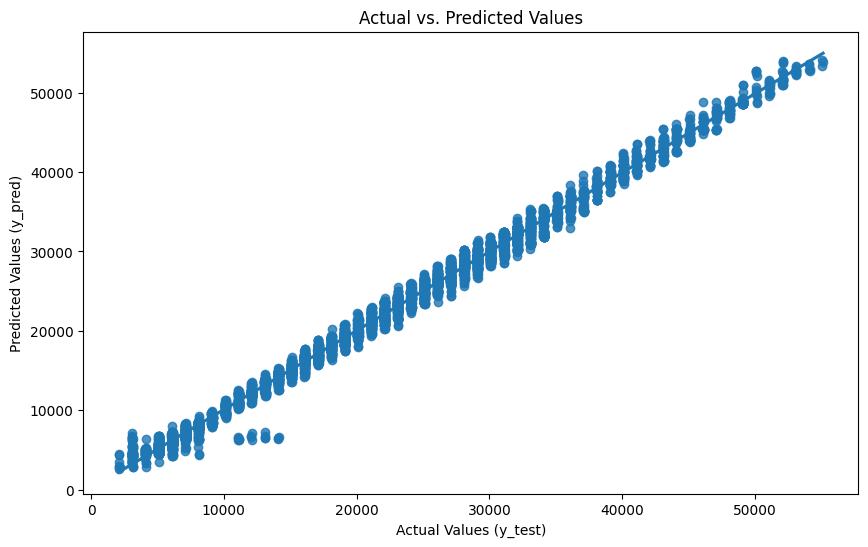

In [ ]:
# Plot a regression plot of Actual and Predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Values (y_test)', y='Predicted Values (y_pred)', data=results_df)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()

The actual values and predicted values produced by optimized Gradient Boosting Regressor model are compared above.

# **Conclusion**

* After identifying the best model through Randomized Search Cross-Validation, the model's predictions closely resemble the actual values, taking into consideration the range and variability of the target variable in the dataset.
* The model explains 99% of the variance in the target variable, indicating a very strong fit to the data.
* Specifically, the RMSE value of 907.06 implies that, on average, the model's predictions differ from the actual product weights by around 907.06 tons.
* This model effectively addressed the issue of demand-supply mismatch by providing accurate predictions for the optimal quantity of products to be shipped from each warehouse. The results demonstrate the model's potential to reduce inventory costs and minimize losses, ultimately contributing to more efficient supply chain management.
* The acceptability of this model depends on how well it aligns with real-world considerations and its ability to meet the broader business objectives.